In [62]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

### data load

In [63]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("")
print("train.num =", mnist.train.num_examples,
     ", test.num =", mnist.test.num_examples,
     ", validation.num =", mnist.validation.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

train.num = 55000 , test.num = 10000 , validation.num = 5000


### hyper parameter 

In [64]:
# Hyper-Parameter
learning_rate = 1e-3
epochs = 30
batch_size = 100

In [65]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  
T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])  # image 28 x 28 x 1 (black / white)

### 컨볼루션층 1

In [66]:
# 1번째 컨볼루션 층, 3x3x32 필터 
W2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  # standard deviation 표준편차 0.01 이내로 뽑음 -> 더 정교한 데이터
b2 = tf.Variable(tf.random_normal([32]))

# 1번째 컨볼루션 연산을 통해 28 x 28 x 1 => 28 x 28 x 32  흑백인 1개 층이 -> 32개 층을 거치게 됨
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 x 28 x 32 => 14 x 14 x 32  max pooling을 통해 4개를 1개로 묶어 가로 세로 2배씩 줄어들게 됨
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 컨볼루션층 2

In [73]:
# 2번째 컨볼루션 층, 3x3x32 필터 
W3 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random_normal([32]))

# 2번째 컨볼루션 연산을 통해 14 x 14 x 32 => 14 x 14 x 32 
C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 1번째 max pooling을 통해 14 x 14 x 32 => 7 x 7 x 32
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### 완전연결층 

In [74]:
# 7 x 7 크기를 가진 32개의 activation map을 flatten 시킴
A3_flat = P3_flat = tf.reshape(A3, [-1, 7*7*32])

### 출력층

In [75]:
# 출력층
W4 = tf.Variable(tf.random_normal([7*7*32, 10], stddev=0.01))
b4 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀 값 Z4, 즉 softmax 에 들어가는 입력 값
Z4 = logits = tf.matmul(A3_flat, W4) + b4

y = A4 = tf.nn.softmax(Z4)

In [76]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z4, labels = T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [77]:
# batch_size x 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal(tf.argmax(A4, 1), tf.argmax(T, 1))

# batch_size x 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

predicted_list = tf.argmax(A4, 1)

In [78]:
index_label_false_list_1 = []

with tf.Session() as sess:  # with를 쓰면 close 하지 않아도 됨
    sess.run(tf.global_variables_initializer())  # 변수 노드 (tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):  # 30번 반복 수행
        total_batch = int(mnist.train.num_examples / batch_size)  # 55000 / 100
        
        for step in range(total_batch):
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})   
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    
    # Accuracy 확인
    test_x_data = mnist.test.images  # 10000 x 784
    test_t_data = mnist.test.labels  # 10000 x 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy =", accuracy_val)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    # list type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_false_list_1.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list_1", len(index_label_false_list_1))

epochs =  0 , step =  0 , loss_val =  2.493673
epochs =  0 , step =  100 , loss_val =  2.2801538
epochs =  0 , step =  200 , loss_val =  0.6573056
epochs =  0 , step =  300 , loss_val =  0.42214835
epochs =  0 , step =  400 , loss_val =  0.29988348
epochs =  0 , step =  500 , loss_val =  0.16096729
epochs =  1 , step =  0 , loss_val =  0.12485569
epochs =  1 , step =  100 , loss_val =  0.32852763
epochs =  1 , step =  200 , loss_val =  0.09119329
epochs =  1 , step =  300 , loss_val =  0.14299092
epochs =  1 , step =  400 , loss_val =  0.094876826
epochs =  1 , step =  500 , loss_val =  0.15803787
epochs =  2 , step =  0 , loss_val =  0.11226136
epochs =  2 , step =  100 , loss_val =  0.061765295
epochs =  2 , step =  200 , loss_val =  0.101638444
epochs =  2 , step =  300 , loss_val =  0.054650165
epochs =  2 , step =  400 , loss_val =  0.106807366
epochs =  2 , step =  500 , loss_val =  0.03568222
epochs =  3 , step =  0 , loss_val =  0.050348412
epochs =  3 , step =  100 , loss_val 

epochs =  26 , step =  200 , loss_val =  0.04081489
epochs =  26 , step =  300 , loss_val =  0.051287815
epochs =  26 , step =  400 , loss_val =  0.0038058893
epochs =  26 , step =  500 , loss_val =  0.008454365
epochs =  27 , step =  0 , loss_val =  0.016415946
epochs =  27 , step =  100 , loss_val =  0.0057496154
epochs =  27 , step =  200 , loss_val =  0.00045703896
epochs =  27 , step =  300 , loss_val =  0.02190488
epochs =  27 , step =  400 , loss_val =  0.008788327
epochs =  27 , step =  500 , loss_val =  0.0021050223
epochs =  28 , step =  0 , loss_val =  0.0032110813
epochs =  28 , step =  100 , loss_val =  0.0051063085
epochs =  28 , step =  200 , loss_val =  0.0077796625
epochs =  28 , step =  300 , loss_val =  0.009795031
epochs =  28 , step =  400 , loss_val =  0.0021701537
epochs =  28 , step =  500 , loss_val =  0.007594654
epochs =  29 , step =  0 , loss_val =  0.0018860048
epochs =  29 , step =  100 , loss_val =  0.0011606656
epochs =  29 , step =  200 , loss_val =  0.

In [79]:
print(index_label_false_list_1)

[[184, 8, 3], [321, 2, 7], [340, 5, 3], [404, 2, 7], [445, 6, 0], [449, 3, 5], [583, 2, 7], [659, 2, 7], [674, 5, 3], [684, 7, 3], [740, 4, 9], [813, 9, 8], [938, 3, 5], [947, 8, 9], [965, 6, 0], [1003, 5, 3], [1014, 6, 5], [1039, 7, 3], [1082, 5, 3], [1112, 4, 6], [1178, 4, 0], [1182, 6, 8], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1319, 8, 0], [1393, 5, 3], [1459, 2, 7], [1522, 7, 9], [1527, 1, 4], [1530, 8, 7], [1709, 9, 5], [1773, 1, 6], [1790, 2, 7], [1878, 8, 3], [1901, 9, 4], [1909, 1, 7], [1993, 1, 7], [2018, 1, 7], [2035, 5, 3], [2053, 4, 9], [2098, 2, 0], [2109, 3, 7], [2118, 6, 0], [2130, 4, 9], [2135, 6, 1], [2148, 4, 9], [2293, 9, 0], [2369, 5, 8], [2437, 2, 7], [2454, 6, 5], [2488, 2, 4], [2532, 6, 1], [2582, 9, 7], [2597, 5, 3], [2654, 6, 1], [2760, 9, 4], [2836, 4, 9], [2896, 8, 0], [2939, 9, 5], [2995, 6, 8], [3030, 6, 0], [3060, 9, 7], [3289, 8, 9], [3336, 5, 7], [3337, 2, 7], [3422, 6, 0], [3474, 2, 1], [3490, 4, 9], [3503, 9, 8], [3520, 6, 4], [3534, 4, 8], [3558,

### 파일로 이미지 저장

In [80]:
# check false data
import os

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()
print(curr_dir)

C:\Users\YUSEUNG\OneDrive - konkuk.ac.kr\DESKTOP\AI 기본과정\실습\16일차_1124


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
100 image is saved now
110 image is saved now
120 image is saved now
130 image is saved now
140 image is saved now
150 image is saved now
160 image is saved now
Elapsed save time =>  0:05:06.698746
Total  168  data is saved


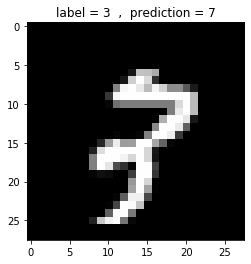

In [81]:
# image 저장할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'false_data_실습3'
save_dir_name = algorithm_name + '_' + str(now.year) + str(now.month) + str(now.day) + '_' + str(now.hour) + str(now.minute) + str(now.second)

os.chdir(curr_dir)
os.mkdir(save_dir_name)

# change dir
os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_false_list_1:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)